In [11]:
import pandas as pd
from glob import glob
import numpy as np
import math

In [2]:
!ls

genes_sr2.txt		    heatmap.ipynb
genes_sr3.txt		    orthologs_blast.tsv
GO_gene_stress-ready_2.csv  Sly.drought_Sly.control.csv
GO_gene_stress-ready_3.csv  Untitled.ipynb


In [7]:
file = open("genes_sr2.txt","r")
genes_sr2 = [gene[:-1] for gene in file]
genes_sr2


['Solyc01g097070',
 'Solyc01g097360',
 'Solyc03g071620',
 'Solyc05g055440',
 'Solyc09g010400',
 'Solyc09g014890',
 'Solyc09g066100',
 'Solyc09g082710',
 'Solyc12g005270',
 'Solyc12g008940',
 'Solyc12g011455']

In [8]:
file = open("genes_sr3.txt","r")
genes_sr3 = [gene[:-1] for gene in file]
genes_sr3

['Solyc01g005180',
 'Solyc01g006180',
 'Solyc01g008340',
 'Solyc01g008360',
 'Solyc01g008460',
 'Solyc01g008520',
 'Solyc01g066640',
 'Solyc01g067550',
 'Solyc01g073910',
 'Solyc01g073950',
 'Solyc01g079290',
 'Solyc01g079320',
 'Solyc01g080690',
 'Solyc01g087300',
 'Solyc01g087990',
 'Solyc01g088470',
 'Solyc01g091350',
 'Solyc01g091820',
 'Solyc01g094530',
 'Solyc01g096790',
 'Solyc01g096800',
 'Solyc01g096900',
 'Solyc01g097800',
 'Solyc01g099360',
 'Solyc01g099380',
 'Solyc01g100080',
 'Solyc01g100270',
 'Solyc01g100960',
 'Solyc01g101020',
 'Solyc01g102760',
 'Solyc01g103080',
 'Solyc01g103360',
 'Solyc01g103980',
 'Solyc01g104640',
 'Solyc01g106060',
 'Solyc01g108180',
 'Solyc01g108510',
 'Solyc01g108910',
 'Solyc01g109340',
 'Solyc01g111060',
 'Solyc01g111810',
 'Solyc02g061840',
 'Solyc02g062370',
 'Solyc02g062540',
 'Solyc02g062920',
 'Solyc02g065370',
 'Solyc02g067740',
 'Solyc02g069340',
 'Solyc02g070100',
 'Solyc02g071770',
 'Solyc02g072000',
 'Solyc02g077840',
 'Solyc02g07

In [9]:
def genes2ortholog(geneList):
    orthologs = pd.read_csv("orthologs_blast.tsv", sep="\t", header=None)
    ortholog2return = []
    for gene in geneList:
        ortholog = orthologs[orthologs[1]==gene][0].values[0]
        ortholog2return.append(ortholog)
    return ortholog2return

In [12]:
sr2 = genes2ortholog(genes_sr2)

In [13]:
sr3 = genes2ortholog(genes_sr3)

In [14]:
print(len(genes_sr2),len(sr2))

11 11


In [15]:
print(len(genes_sr3),len(sr3))

309 309


In [16]:
deseq = pd.read_csv("Sly.drought_Sly.control.csv")
deseq = deseq[["Row.names","Sly.control_3","Sly.control_2","Sly.control_1","Sly.drought_3","Sly.drought_2","Sly.drought_1","Spenn.control_3","Spenn.control_2","Spenn.control_1","Spenn.drought_3","Spenn.drought_2","Spenn.drought_1"]]
dict = {"Row.names":"Orthologs",
        }
deseq.fillna(0)
deseq.rename(dict, axis=1, inplace=True)
deseq

,Orthologs,Sly.control_3,Sly.control_2,Sly.control_1,Sly.drought_3,Sly.drought_2,Sly.drought_1,Spenn.control_3,Spenn.control_2,Spenn.control_1,Spenn.drought_3,Spenn.drought_2,Spenn.drought_1
0,ortholog_9625,1682.441195,1569.439437,1559.906815,4725.133707,4637.458766,4560.218156,2386.137623,2234.831510,2319.151429,2244.471065,2253.588029,2333.471533
1,ortholog_7187,1288.275620,1208.623318,1281.623787,144.708733,103.341700,99.472439,463.361350,468.828784,408.024828,497.928829,386.247631,434.961282
2,ortholog_17229,1012.137026,1313.769120,1471.856326,28.457366,21.529521,33.765874,522.292594,516.197495,684.247822,146.598335,92.508692,96.658063
3,ortholog_3067,923.060060,745.981792,932.682960,99.298043,93.007530,88.521345,759.173084,725.105658,893.167751,418.732027,473.987833,425.842597
4,ortholog_3713,4185.503939,3318.180136,3937.270024,513.443540,487.428349,553.942850,934.811301,932.799239,974.492287,1065.786748,1437.222666,1115.215195
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18087,ortholog_21079,0.000000,2.213596,2.174086,1.210952,1.722362,0.000000,2.311029,0.000000,2.804294,4.212596,1.907396,0.000000
18088,ortholog_21080,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.466544,8.502076,0.000000,2.527558,0.000000,0.000000
18089,ortholog_21085,0.000000,6.640787,0.000000,0.000000,2.583542,0.000000,3.466544,14.574988,0.000000,2.527558,1.907396,0.000000
18090,ortholog_21091,1.113462,4.427192,4.348172,2.421903,0.000000,0.912591,0.000000,0.000000,0.000000,0.842519,0.000000,0.000000


In [17]:
df_sr2 = deseq[deseq["Orthologs"].isin(sr2)].reset_index(drop=True).set_index("Orthologs", drop=True)
df_sr3 = deseq[deseq["Orthologs"].isin(sr3)].reset_index(drop=True).set_index("Orthologs", drop=True)
df_sr2

,Sly.control_3,Sly.control_2,Sly.control_1,Sly.drought_3,Sly.drought_2,Sly.drought_1,Spenn.control_3,Spenn.control_2,Spenn.control_1,Spenn.drought_3,Spenn.drought_2,Spenn.drought_1
Orthologs,,,,,,,,,,,,
ortholog_15482,446.498292,449.359952,359.811258,291.233895,369.446576,331.270601,424.073854,495.549596,528.609485,374.078511,271.803888,376.601697
ortholog_8221,381.917492,239.068349,372.855775,297.288653,212.711665,272.864765,432.162456,445.751720,405.220534,287.299037,321.396177,303.652216
ortholog_18167,27.836552,12.174777,13.044517,12.109517,12.056532,6.388138,27.732350,32.793723,18.227913,12.637788,7.629583,3.647474
ortholog_10223,1301.637165,1179.846573,1354.455674,1131.634405,1222.876778,1212.833686,1806.069300,1942.117165,1783.531208,1262.093715,1233.131325,1376.009591
ortholog_1250,74.601959,77.475854,71.744843,61.153063,60.282658,69.356930,93.596682,98.381170,98.150302,73.299168,59.129267,62.918928
ortholog_17046,1185.837110,1362.468228,1130.524800,1233.959828,1445.922613,1328.732767,1592.299102,1653.046568,1560.589807,1016.078117,1221.686951,1158.984884
ortholog_6831,1600.045001,1485.322796,1505.554661,1449.509238,1815.369188,1557.793154,1803.758271,2226.329433,1784.933355,1514.006946,1365.695327,1499.111841
ortholog_1560,826.188859,1051.458015,802.237791,851.904552,808.648799,913.503777,1217.912375,1475.717546,1302.594726,1032.928501,981.355092,1002.143499
ortholog_19275,511.079092,458.214335,460.906265,461.372615,481.400084,455.383002,762.639628,705.672341,673.030644,543.424864,496.876582,515.205712


In [18]:
means = {}

for i, ortholog in enumerate(df_sr2.index):
    means[ortholog] = {
                            "S. lycopersicum (control)":(df_sr2["Sly.control_3"][i]+df_sr2["Sly.control_2"][i]+df_sr2["Sly.control_1"][i])/3,
                            "S. lycopersicum (drought)":(df_sr2["Sly.drought_3"][i]+df_sr2["Sly.drought_2"][i]+df_sr2["Sly.drought_1"][i])/3,
                            "S. pennellii (control)":(df_sr2["Spenn.control_3"][i]+df_sr2["Spenn.control_2"][i]+df_sr2["Spenn.control_1"][i])/3,
                            "S. pennellii (drought)":(df_sr2["Spenn.drought_3"][i]+df_sr2["Spenn.drought_2"][i]+df_sr2["Spenn.drought_1"][i])/3,
    }
for i, ortholog in enumerate(df_sr3.index):
    means[ortholog] = {
                            "S. lycopersicum (control)":(df_sr3["Sly.control_3"][i]+df_sr3["Sly.control_2"][i]+df_sr3["Sly.control_1"][i])/3,
                            "S. lycopersicum (drought)":(df_sr3["Sly.drought_3"][i]+df_sr3["Sly.drought_2"][i]+df_sr3["Sly.drought_1"][i])/3,
                            "S. pennellii (control)":(df_sr3["Spenn.control_3"][i]+df_sr3["Spenn.control_2"][i]+df_sr3["Spenn.control_1"][i])/3,
                            "S. pennellii (drought)":(df_sr3["Spenn.drought_3"][i]+df_sr3["Spenn.drought_2"][i]+df_sr3["Spenn.drought_1"][i])/3,
                            
    }
df = pd.DataFrame(means).T
row_means = df.mean(axis=1)
row_stds = df.std(axis=1)

# Apply the z-score formula
zscore_df = df.sub(row_means, axis=0).div(row_stds, axis=0)

group = []
for i, ortholog in enumerate(df_sr2.index):
    group.append("Stress-ready (case 2)")
for i, ortholog in enumerate(df_sr3.index):
    group.append("Stress-ready (case 3)")
zscore_df["Group"] = group
zscore_df

/tmp/ipykernel_897448/489630881.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "S. lycopersicum (control)":(df_sr2["Sly.control_3"][i]+df_sr2["Sly.control_2"][i]+df_sr2["Sly.control_1"][i])/3,
/tmp/ipykernel_897448/489630881.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  "S. lycopersicum (drought)":(df_sr2["Sly.drought_3"][i]+df_sr2["Sly.drought_2"][i]+df_sr2["Sly.drought_1"][i])/3,
/tmp/ipykernel_897448/489630881.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access

,S. lycopersicum (control),S. lycopersicum (drought),S. pennellii (control),S. pennellii (drought),Group
ortholog_15482,0.354944,-0.875328,1.253272,-0.732888,Stress-ready (case 2)
ortholog_8221,0.003747,-0.991394,1.368295,-0.380648,Stress-ready (case 2)
ortholog_18167,0.261359,-0.645347,1.296868,-0.912880,Stress-ready (case 2)
ortholog_10223,-0.407559,-0.706964,1.482739,-0.368216,Stress-ready (case 2)
ortholog_1250,-0.026203,-0.747407,1.421566,-0.647956,Stress-ready (case 2)
...,...,...,...,...,...
ortholog_17626,-0.814226,1.458864,-0.344374,-0.300264,Stress-ready (case 3)
ortholog_8675,-1.062041,-0.089940,-0.198752,1.350732,Stress-ready (case 3)
ortholog_18631,-1.205885,0.709766,-0.429807,0.925926,Stress-ready (case 3)
ortholog_12643,-1.107649,1.272791,-0.346654,0.181511,Stress-ready (case 3)


In [19]:
#GO
files = ["GO_gene_stress-ready_2.csv","GO_gene_stress-ready_3.csv"]
data = {}
syn = {
    "GO_gene_stress-ready_2.csv": "Stress-ready 2",
    "GO_gene_stress-ready_3.csv": "Stress-ready 3",
    "GO_gene_unique-response_3.csv": "Unique response3",
    "GO_gene_unique-response_4.csv": "Unique response 4"
}
for file in files:
    
    df = pd.read_csv(file, sep="\t")
    df = df[(df["p_fdr_bh"]<0.05) & (df["NS"]=="BP") & (df["depth"]>=5)][["name","depth","p_fdr_bh"]]
    df.reset_index(drop=True, inplace=True)
    #if file not in data:
    #    data[syn[file]] = {"Stress-ready 2":np.nan,"Stress-ready 3":np.nan, "Unique response 1":np.nan,"Unique response 2":np.nan, "Unique response 4":np.nan}
    for i, name in enumerate(df["name"]):
        if name not in data:
            data[name] = {"Stress-ready 2":np.nan, "Stress-ready 3":np.nan}
        data[name][syn[file]] = -1*math.log(df["p_fdr_bh"][i])
df2 = pd.DataFrame(data).T
df2
        

,Stress-ready 2,Stress-ready 3
nucleosome assembly,5.203137,NaN
DNA conformation change,5.203137,NaN
nucleosome organization,5.118516,NaN
protein-DNA complex assembly,3.515363,NaN
RNA metabolic process,NaN,13.393389
nucleic acid metabolic process,NaN,13.393389
protein localization to nucleus,NaN,7.430447
RNA modification,NaN,7.106758
ncRNA processing,NaN,7.106758
protein import into nucleus,NaN,6.869498


In [20]:
# transforming RNA splicing, via transesterification reactions with bulged adenosine as nucleophile	 into RNA splicing
index = []
for index_ in df2.index:
    index_ = index_.split(",")[0] 
    if len(index_.split(" ")) >= 3:
        aux = index_.split(" ")
        index_ = ""
        for i,w in enumerate(aux):
            flag = False
            index_ += w+" "
            if i == round(len(aux)/2)-1:
                index_+="\n"
    if index_[-1] == "\n":
        index_ = index_[:-1]
    index.append(index_)
df2["index"] = index
df2.set_index("index", drop=True, inplace=True)
df2

,Stress-ready 2,Stress-ready 3
index,,
nucleosome assembly,5.203137,NaN
DNA conformation \nchange,5.203137,NaN
nucleosome organization,5.118516,NaN
protein-DNA complex \nassembly,3.515363,NaN
RNA metabolic \nprocess,NaN,13.393389
nucleic acid \nmetabolic process,NaN,13.393389
protein localization \nto nucleus,NaN,7.430447
RNA modification,NaN,7.106758
ncRNA processing,NaN,7.106758


In [21]:
df2

,Stress-ready 2,Stress-ready 3
index,,
nucleosome assembly,5.203137,NaN
DNA conformation \nchange,5.203137,NaN
nucleosome organization,5.118516,NaN
protein-DNA complex \nassembly,3.515363,NaN
RNA metabolic \nprocess,NaN,13.393389
nucleic acid \nmetabolic process,NaN,13.393389
protein localization \nto nucleus,NaN,7.430447
RNA modification,NaN,7.106758
ncRNA processing,NaN,7.106758


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

[Text(0.5, 1, '$\\it{S. lycopersicum}$\n(control)'),
 Text(1.5, 1, '$\\it{S. lycopersicum}$\n(drought)'),
 Text(2.5, 1, '$\\it{S. pennellii}$\n(control)'),
 Text(3.5, 1, '$\\it{S.pennellii}$\n(drought)')]

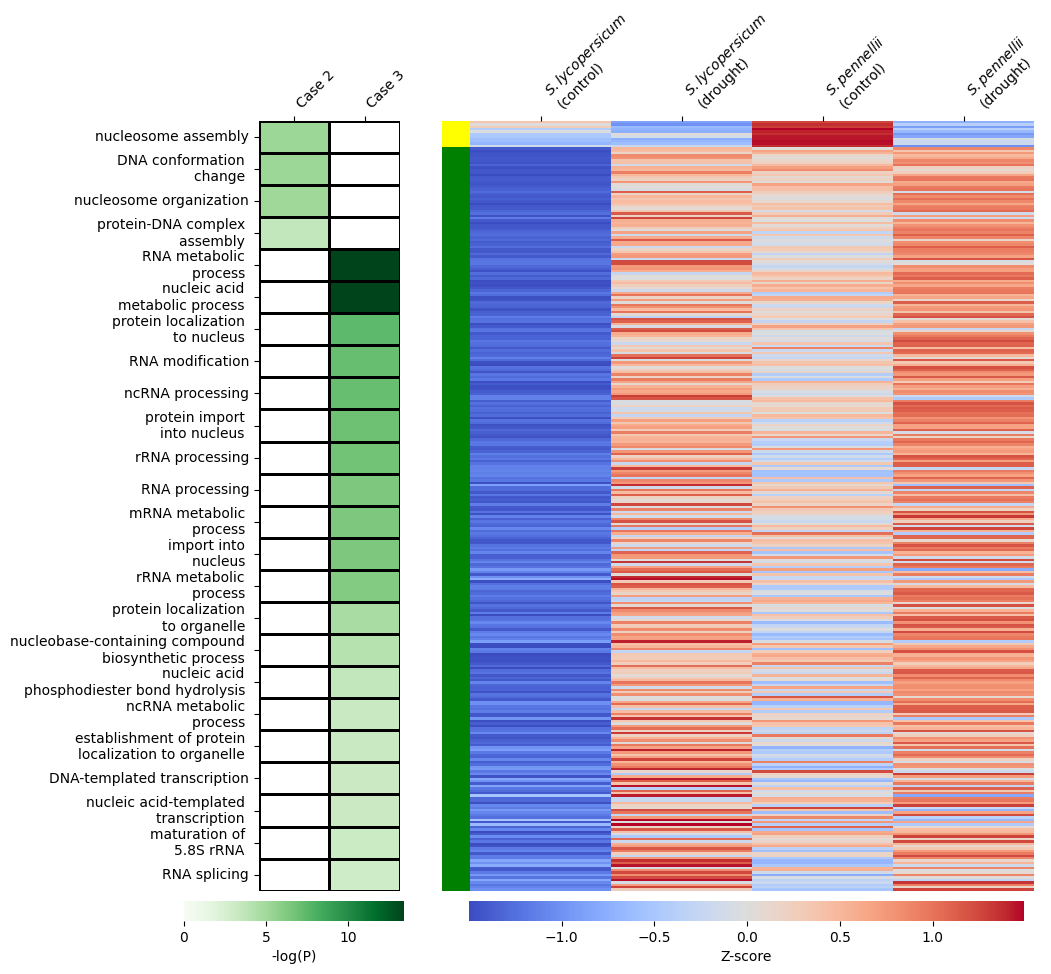

In [23]:
f, (ax0, ax1) = plt.subplots(1, 2, gridspec_kw={'width_ratios': [4, 16]},sharey=False, figsize=(10,10))
cbar_ax0 = f.add_axes([0.05, 0.08, 0.22, 0.02])
sns.heatmap(df2, cmap="Greens", ax=ax0, linecolor="k", linewidth=.8, cbar_ax=cbar_ax0, cbar_kws = {"label":"-log(P)", 'orientation':'horizontal'},annot_kws={"size": 6}, vmin=0)
#fig = ax0.get_figure()
#cbar = ax0.collections[0].colorbar
#cbar.set_label('-Log(P)', rotation=90, labelpad=20)
#plt.xticks(rotation=45, ha='left')
ax0.set_ylabel('') 
ax0.set_xticklabels(["Case 2","Case 3"], rotation = 45, ha = "left")
ax0.tick_params(left=True, bottom=False, top=True, labeltop=True, labelbottom=False)

cbar_ax1 = f.add_axes([0.335, 0.08, 0.555, 0.02])
sns.heatmap(zscore_df.drop(['Group'], axis=1), ax=ax1, cmap="coolwarm",cbar_ax=cbar_ax1,cbar_kws={'label': 'Z-score','orientation':'horizontal'},yticklabels=False)
lut = {'Stress-ready (case 2)': 'yellow', 'Stress-ready (case 3)': 'green'}
row_colors = zscore_df['Group'].map(lut)
for i, color in enumerate(row_colors):
    ax1.add_patch(plt.Rectangle(xy=(-0.05, i), width=0.05, height=1, color=color, lw=0,
                               transform=ax1.get_yaxis_transform(), clip_on=False))

ax1.tick_params(left=False, bottom=False, top=True, labeltop=True,labelbottom=False)
#ax1.set_yticklabels([])
ax1.set_xticklabels(["$\it{S. lycopersicum}$\n(control)","$\it{S. lycopersicum}$\n(drought)","$\it{S. pennellii}$\n(control)","$\it{S.pennellii}$\n(drought)"], rotation = 45, ha = "left")




In [24]:
from matplotlib.gridspec import GridSpec

{'whiskers': [<matplotlib.lines.Line2D at 0x7e7cde13f280>,
 'caps': [<matplotlib.lines.Line2D at 0x7e7cde13f7c0>,
 'boxes': [<matplotlib.patches.PathPatch at 0x7e7cde13eda0>],
 'medians': [<matplotlib.lines.Line2D at 0x7e7cde13fd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x7e7cde13ffa0>],
 'means': []}

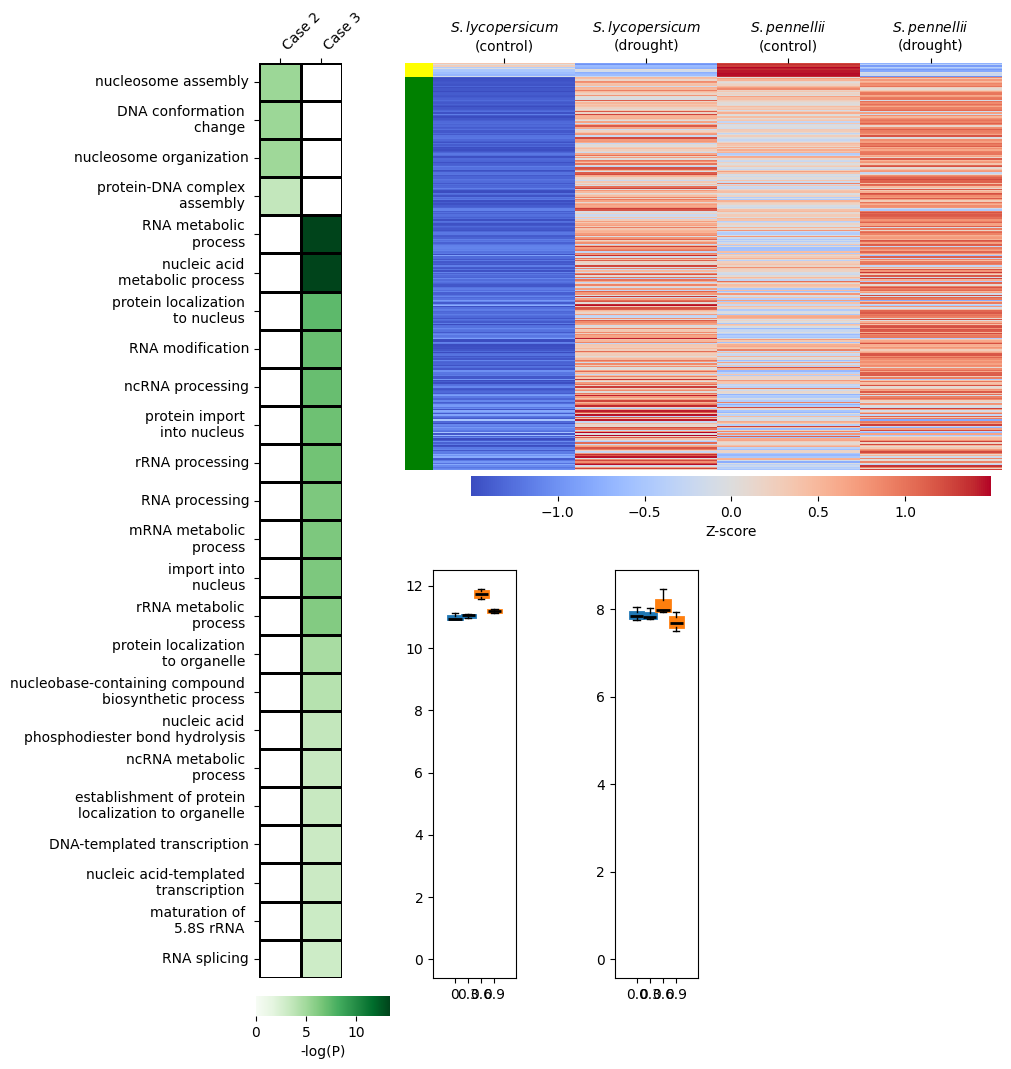

In [25]:
#def format_axes(fig):
#    for i, ax in enumerate(fig.axes):
#        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
#        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(layout="constrained", figsize=(10,10))

gs = GridSpec(2, 5, figure=fig, hspace=0.1, wspace=0.2)

ax0 = fig.add_subplot(gs[:, 0])

cbar_ax0 = fig.add_axes([0.25, -0.01, 0.134, 0.02])
sns.heatmap(df2, cmap="Greens", ax=ax0, linecolor="k", linewidth=.8, cbar_ax=cbar_ax0, cbar_kws = {"label":"-log(P)", 'orientation':'horizontal'},annot_kws={"size": 6}, vmin=0)
ax0.set_ylabel('') 
ax0.set_xticklabels(["Case 2","Case 3"], rotation = 45, ha = "left")
ax0.tick_params(left=True, bottom=False, top=True, labeltop=True, labelbottom=False)

ax1 = fig.add_subplot(gs[0, 1:])

cbar_ax1 = fig.add_axes([0.465, 0.51, 0.52, 0.02])
sns.heatmap(zscore_df.drop(['Group'], axis=1), ax=ax1, cmap="coolwarm",cbar_ax=cbar_ax1,cbar_kws={'label': 'Z-score','orientation':'horizontal'},yticklabels=False)
lut = {'Stress-ready (case 2)': 'yellow', 'Stress-ready (case 3)': 'green'}
row_colors = zscore_df['Group'].map(lut)
for i, color in enumerate(row_colors):
    ax1.add_patch(plt.Rectangle(xy=(-0.05, i), width=0.05, height=1, color=color, lw=0,
                               transform=ax1.get_yaxis_transform(), clip_on=False))

ax1.tick_params(left=False, bottom=False, top=True, labeltop=True,labelbottom=False)
#ax1.set_yticklabels([])
ax1.set_xticklabels(["$\it{S. lycopersicum}$\n(control)","$\it{S. lycopersicum}$\n(drought)","$\it{S. pennellii}$\n(control)","$\it{S.pennellii}$\n(drought)"], rotation = 0, ha = "center")


ax2 = fig.add_subplot(gs[1, 1])

ax2.plot(0,0)

#Solyc09g010400	Sopen09g005140	ortholog_12597	-0.54605410571863
sly_control1 = [10.9276342869734,11.1241428328347,10.9441763589824]
sly_drought1 = [11.052952349541, 11.0856132881269, 10.9548193609718]
spe_control1 = [11.5598508155185,11.9013459194217,11.7334814702834]
spe_drought1 = [11.2600589779376,11.2045187155258,11.1401478565566]

ax2.boxplot(sly_control1,positions= [0], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(sly_drought1,positions = [0.3], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_control1,positions = [0.6], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange", "facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_drought1,positions = [0.9], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)

			
#Solyc09g082710	Sopen09g031570	ortholog_9872	-0.53714497213417
ax3= fig.add_subplot(gs[1, 2])
ax3.plot(0,0)

sly_control2 = [8.04480773409128,7.84030991952215,7.75499859150296]
sly_drought2 = [7.7636254060006, 8.0113538392524, 7.81525514150947]
spe_control2 = [7.96576363267084,8.45984605614018,7.9347549404084]
spe_drought2 = [7.92636118836058,7.687025101228, 7.48849941701766]

ax3.boxplot(sly_control2,positions= [0.0], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax3.boxplot(sly_drought2,positions = [0.3], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax3.boxplot(spe_control2,positions = [0.6], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax3.boxplot(spe_drought2,positions = [0.9], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)

##Solyc06g068170	Sopen06g025440	ortholog_13336	5.27650708330517
#ax3 = fig.add_subplot(gs[1, 3:])
#ax3.plot(0,0)
#
#sly_control3 = [4.75979081854539,4.75979081854539,4.75979081854539]
#sly_drought3 = [5.28518040594981,5.70520603543415,5.54443806808631]
#spe_control3 = [5.27314162178969,5.28595880823219,5.22197052659145]
#spe_drought3 = [5.59200689153499,5.22658762807643,5.34755934673171]
#
#ax3.boxplot(sly_control3,positions= [0], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
#ax3.boxplot(sly_drought3,positions = [0.3], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
#ax3.boxplot(spe_control3,positions = [0.6], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
#ax3.boxplot(spe_drought3,positions = [0.9], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
#
##Solyc09g097930	Sopen09g035870	ortholog_13242	5.10540002548879
#sly_control4 = [4.75979081854539, 4.75979081854539, 4.75979081854539]
#sly_drought4 = [5.55661214868588, 5.47981780004976, 5.40303671390057]
#spe_control4 = [5.35153268174187, 5.19019230875079, 5.22197052659145]
#spe_drought4 = [5.11866349705162, 4.75979081854539, 5.45336911161532]
#
#ax3.boxplot(sly_control4,positions= [1.4], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
#ax3.boxplot(sly_drought4,positions = [1.7], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
#ax3.boxplot(spe_control4,positions = [2.0], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
#ax3.boxplot(spe_drought4,positions = [2.3], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
#
#ax3.grid()

#ax2.set_xticks([0.47, 2.47, 4.47, 6.47],["HTA12\n(Solyc09g010400\nSopen09g005140)", "GAMMA-H2AX\n(Solyc09g082710\nSopen09g031570)", "Solyc06g068170\nSopen06g025440", "Solyc09g097930\nSopen09g035870"])
#ax2.set_ylabel("Normalized Counts (DESeq2 VST)")
##ax2.set_ylabel("Normalized Counts")

In [26]:
import matplotlib.patches as mpatches


/home/administrador/python/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


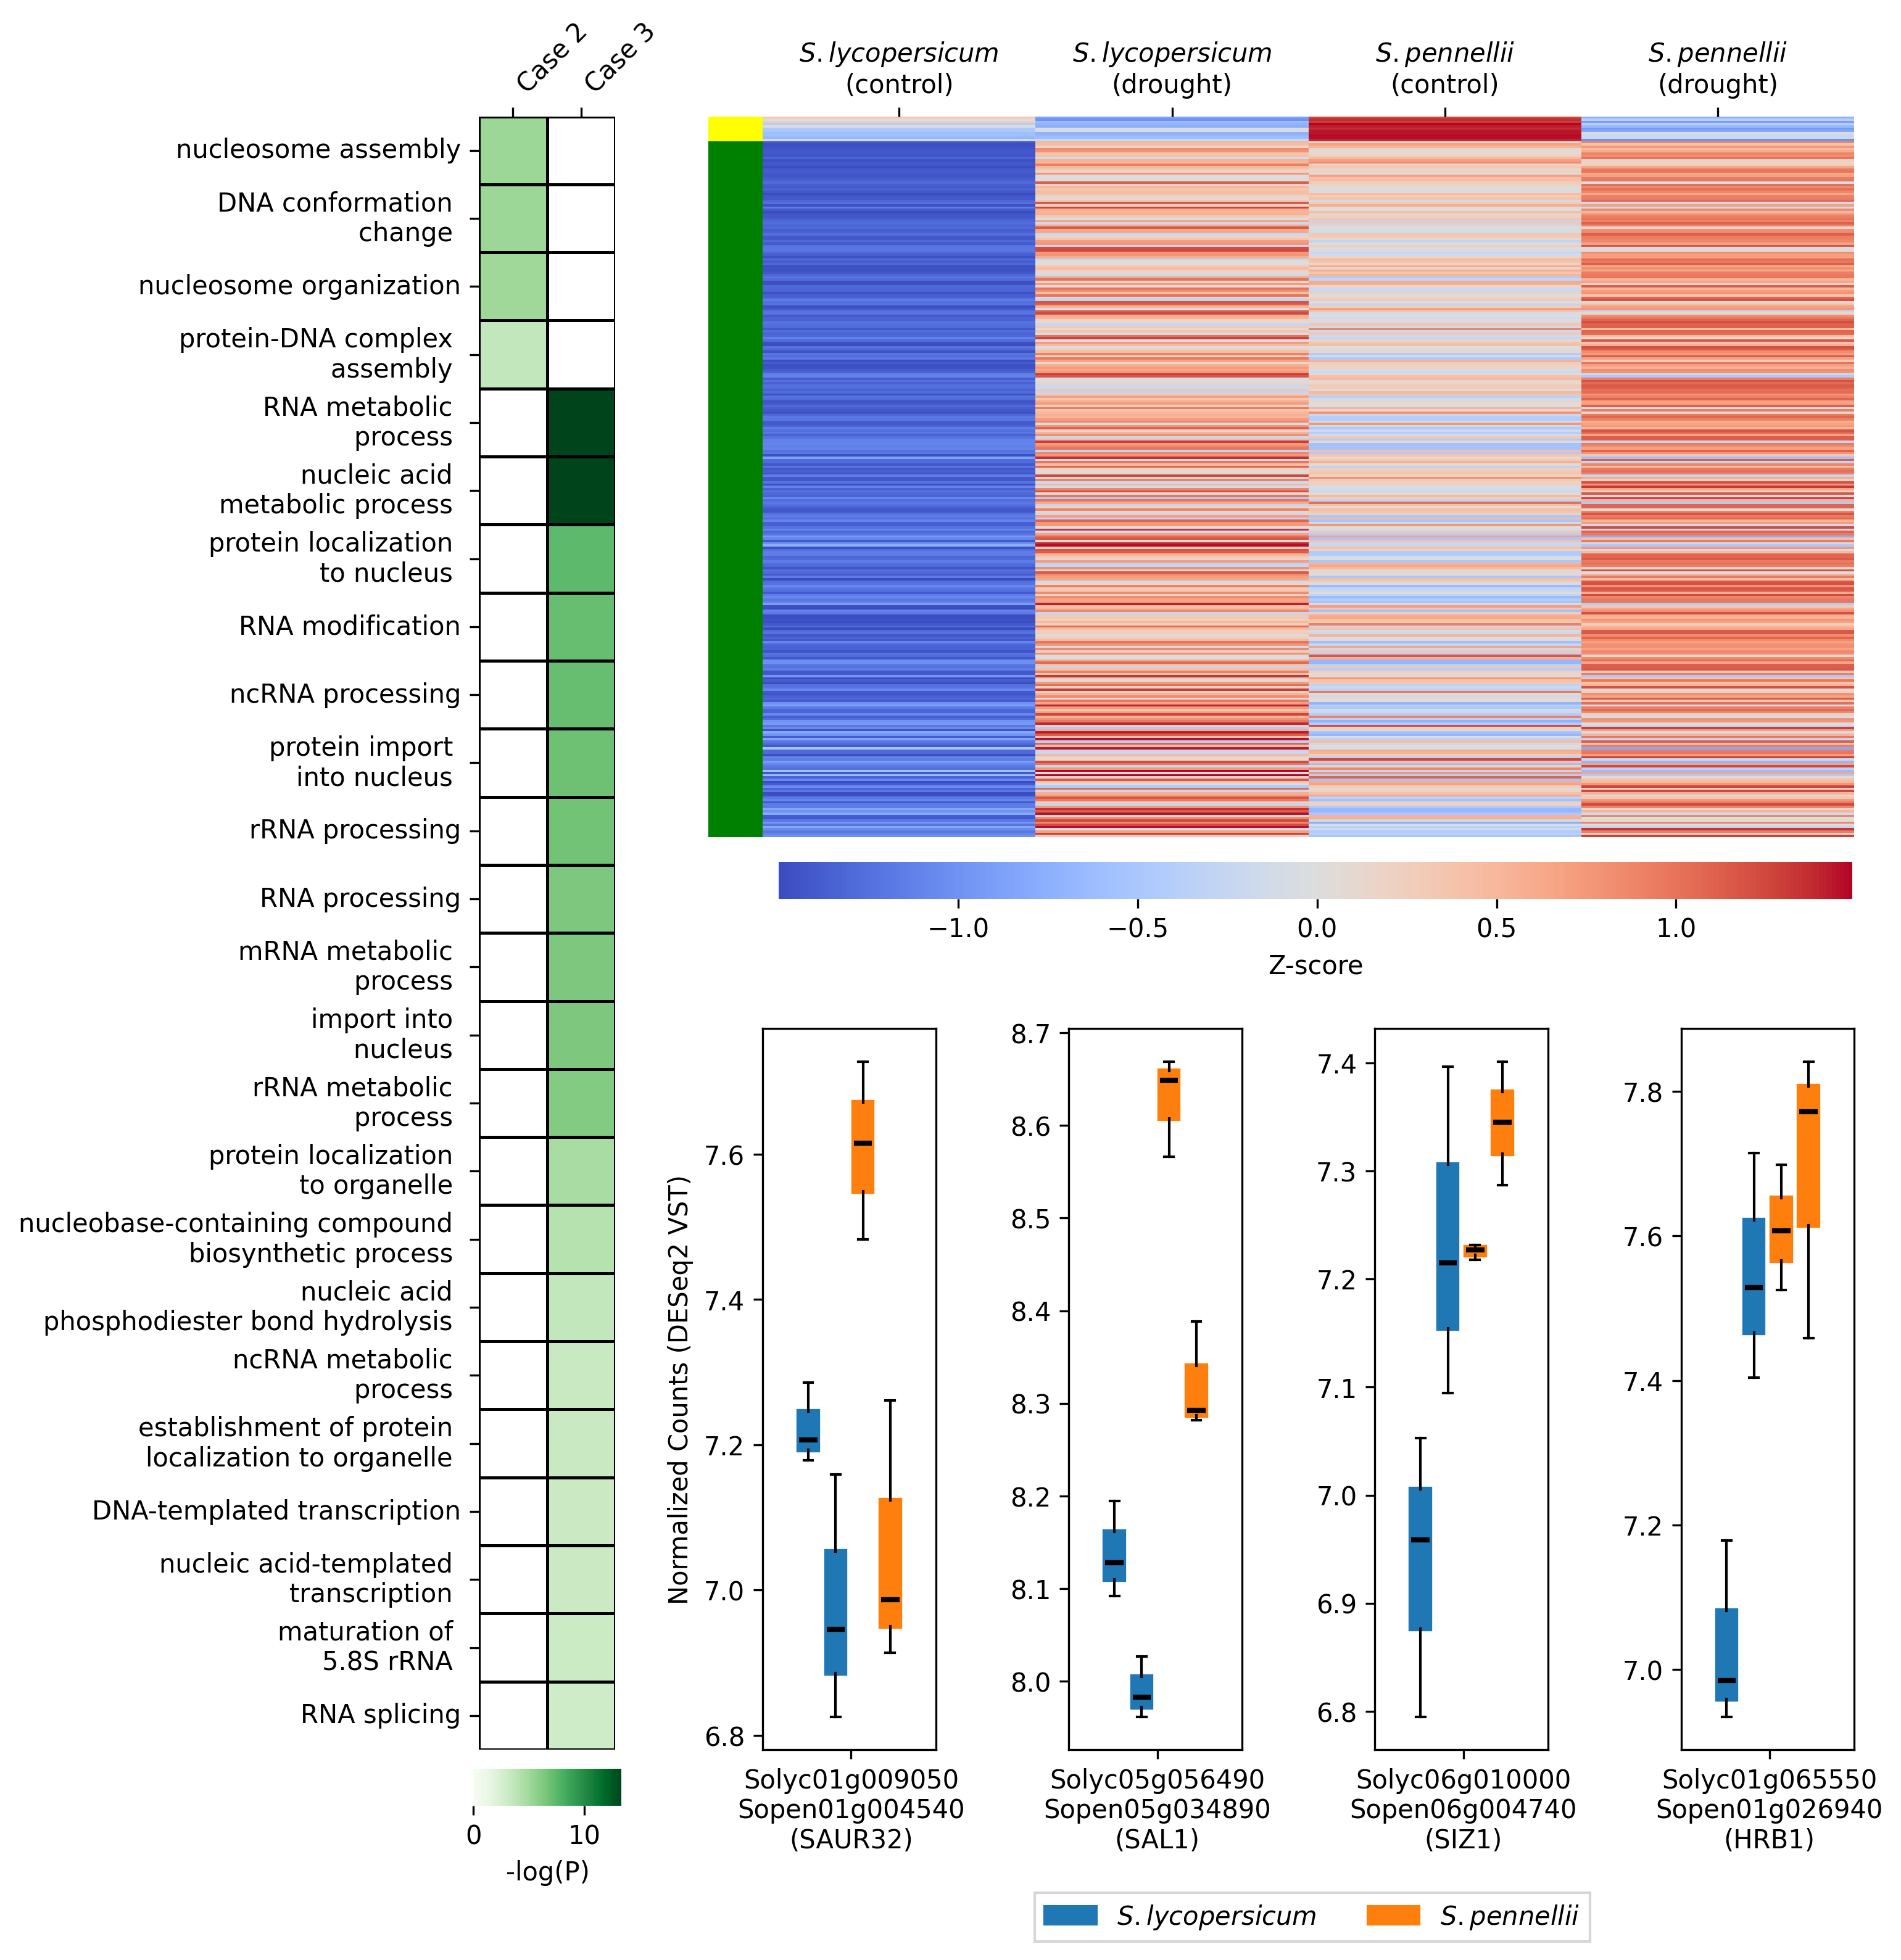

/tmp/ipykernel_897448/589538044.py:118: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.savefig("heatmap.pdf",  bbox_inches='tight', dpi=300)


In [38]:
#def format_axes(fig):
#    for i, ax in enumerate(fig.axes):
#        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
#        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(layout="constrained", figsize=(10,10), dpi=300)

gs = GridSpec(2, 10, figure=fig, hspace=0.1, wspace=0.2)

ax0 = fig.add_subplot(gs[:, 0:2])

cbar_ax0 = fig.add_axes([0.25, 0.03, 0.08, 0.02])
sns.heatmap(df2, cmap="Greens", ax=ax0, linecolor="k", linewidth=.8, cbar_ax=cbar_ax0, cbar_kws = {"label":"-log(P)", 'orientation':'horizontal'},annot_kws={"size": 6}, vmin=0)
ax0.set_ylabel('') 
ax0.set_xticklabels(["Case 2","Case 3"], rotation = 45, ha = "left")
ax0.tick_params(left=True, bottom=False, top=True, labeltop=True, labelbottom=False)

ax1 = fig.add_subplot(gs[0, 2:])

cbar_ax1 = fig.add_axes([0.415, 0.52, 0.58, 0.02])
sns.heatmap(zscore_df.drop(['Group'], axis=1), ax=ax1, cmap="coolwarm",cbar_ax=cbar_ax1,cbar_kws={'label': 'Z-score','orientation':'horizontal'},yticklabels=False)
lut = {'Stress-ready (case 2)': 'yellow', 'Stress-ready (case 3)': 'green'}
row_colors = zscore_df['Group'].map(lut)
for i, color in enumerate(row_colors):
    ax1.add_patch(plt.Rectangle(xy=(-0.05, i), width=0.05, height=1, color=color, lw=0,
                               transform=ax1.get_yaxis_transform(), clip_on=False))

ax1.tick_params(left=False, bottom=False, top=True, labeltop=True,labelbottom=False)
#ax1.set_yticklabels([])
ax1.set_xticklabels(["$\it{S. lycopersicum}$\n(control)","$\it{S. lycopersicum}$\n(drought)","$\it{S. pennellii}$\n(control)","$\it{S.pennellii}$\n(drought)"], rotation = 0, ha = "center")


ax2 = fig.add_subplot(gs[1, 2:4])

#ax2.plot(0,0)

#ortholog_6782	Solyc06g053290	Sopen06g018350
#Regulates ABA-mediated responses to drought stress.
sly_control1 = [7.17866832597378 ,7.20672322967578, 7.28548912912002]
sly_drought1 = [6.94615335672624, 7.15903267668921, 6.82551953830552]
spe_control1 = [7.61496439579085, 7.48240591336841, 7.72770345193021]
spe_drought1 = [6.91351257326491, 7.26069070850708, 6.98660299716961]

ax2.boxplot(sly_control1,positions= [0], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(sly_drought1,positions = [0.3], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_control1,positions = [0.6], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange", "facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_drought1,positions = [0.9], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.set_xticks([0.47],["Solyc01g009050\nSopen01g004540\n(SAUR32)"])
ax2.set_ylabel("Normalized Counts (DESeq2 VST)")		


#ortholog_12986	Solyc05g056490	Sopen05g034890
#Encodes a bifunctional protein that has 3'(2'),5'-bisphosphate nucleotidase and inositol polyphosphate 1-phosphatase activities 
#and rescues sulfur assimilation mutants in yeast.  It is involved in the response to cold, drought (negative regulator of drought 
#tolerance), and ABA. Mutants in this gene exhibit enhanced induction of stress genes in response to cold, ABA, salt and dehydration 
#and increased levels of  3'-phosphoadenosine 5'-phosphate (PAP). Involved in degradation of small mRNAs. Mutants also affect the 
#accumulation of miRNA target cleavage products. Regulates light-dependent repression of hypocotyl elongation and flowering time via its 
#3'(2'),5'-bisphosphate nucleotidase activity. Its activity is sensitive to the redox state of its environment, decreasing under oxidative 
#conditions and is regulated by dimerization and intra and inter-molecular disulfide bond formation.
ax3= fig.add_subplot(gs[1,4:6])
#ax3.plot(0,0)

sly_control2 = [8.12835814937316, 8.09198241281695, 8.19476868185012]
sly_drought2 = [8.02715894202372, 7.96180525395571, 7.98279408173784]
spe_control2 = [8.64861052143399, 8.66902211148046, 8.56585327813938]
spe_drought2 = [8.3883610968491, 8.28184369247645, 8.29254828539094]

ax3.boxplot(sly_control2,positions= [0.0], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax3.boxplot(sly_drought2,positions = [0.3], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax3.boxplot(spe_control2,positions = [0.6], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax3.boxplot(spe_drought2,positions = [0.9], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax3.set_xticks([0.47],["Solyc05g056490\nSopen05g034890\n(SAL1)"])


#ortholog_16611	Solyc06g010000	Sopen06g004740

#Encodes  a plant small ubiquitin-like modifier (SUMO) E3 ligase that is a focal controller of Pi starvation-dependent responses. 
#Also required for SA and PAD4-mediated R gene signalling, which in turn confers innate immunity in Arabidopsis.  Also involved in the 
#regulation of plant growth, drought responses and freezing tolerance. This latter effect is most likely due to SIZ1 dependent ABI5 
#sumoylation. Regulates leaf cell division and expansion through salicylic acid accumulation.  signaling
ax4 = fig.add_subplot(gs[1, 6:8])

sly_control3 = [6.79495225532165, 7.05281187873411, 6.95855970954733]
sly_drought3 = [7.21471413639823, 7.09437576403863, 7.39629518277906]
spe_control3 = [7.22703251237371, 7.21770180946425, 7.23125525521782]
spe_drought3 = [7.34488624870378, 7.40134411952293, 7.28699858977618]

ax4.boxplot(sly_control3,positions= [0], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax4.boxplot(sly_drought3,positions = [0.3], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax4.boxplot(spe_control3,positions = [0.6], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax4.boxplot(spe_drought3,positions = [0.9], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax4.set_xticks([0.47],["Solyc06g010000\nSopen06g004740\n(SIZ1)"])

#ortholog_5971	Solyc01g065550	Sopen01g026940 HRB1
#Drought-responsive family protein
#Identified in a screen for mutations hypersensitive to red and blue light. Mutants have shorter hypocotyls. Encodes a nuclear localized 
#protein with similarity to drought induced proteins. Contains a ZZ zinc finger domain which is thought to mediate protein-protein 
#interactions.May be involved in red and blue light signal transduction.
ax5 = fig.add_subplot(gs[1, 8:])
sly_control4 = [7.17866832597378, 6.9347506002361, 6.98477088618662]
sly_drought4 = [7.52844621241052, 7.71429575331494, 7.40429454561732]
spe_control4 = [7.52544052191818, 7.6069921614272, 7.69829039775036]
spe_drought4 = [7.77139569969136, 7.84124833177901, 7.45818340994426]

ax5.boxplot(sly_control4,positions= [0], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax5.boxplot(sly_drought4,positions = [.3], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax5.boxplot(spe_control4,positions = [.6], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax5.boxplot(spe_drought4,positions = [.9], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax5.set_xticks([0.47],["Solyc01g065550\nSopen01g026940\n(HRB1)"])

blue_patch = mpatches.Patch(color='tab:blue', label='$\it{S. lycopersicum}$')
orange_patch = mpatches.Patch(color='tab:orange', label='$\it{S. pennellii}$')
fig.legend(handles=[blue_patch, orange_patch], bbox_to_anchor=(0.86, -0.01), fancybox=False, shadow=False, ncol=2)


plt.show()
##ax2.set_ylabel("Normalized Counts")
fig.savefig("heatmap.pdf",  bbox_inches='tight', dpi=300)

/home/administrador/python/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


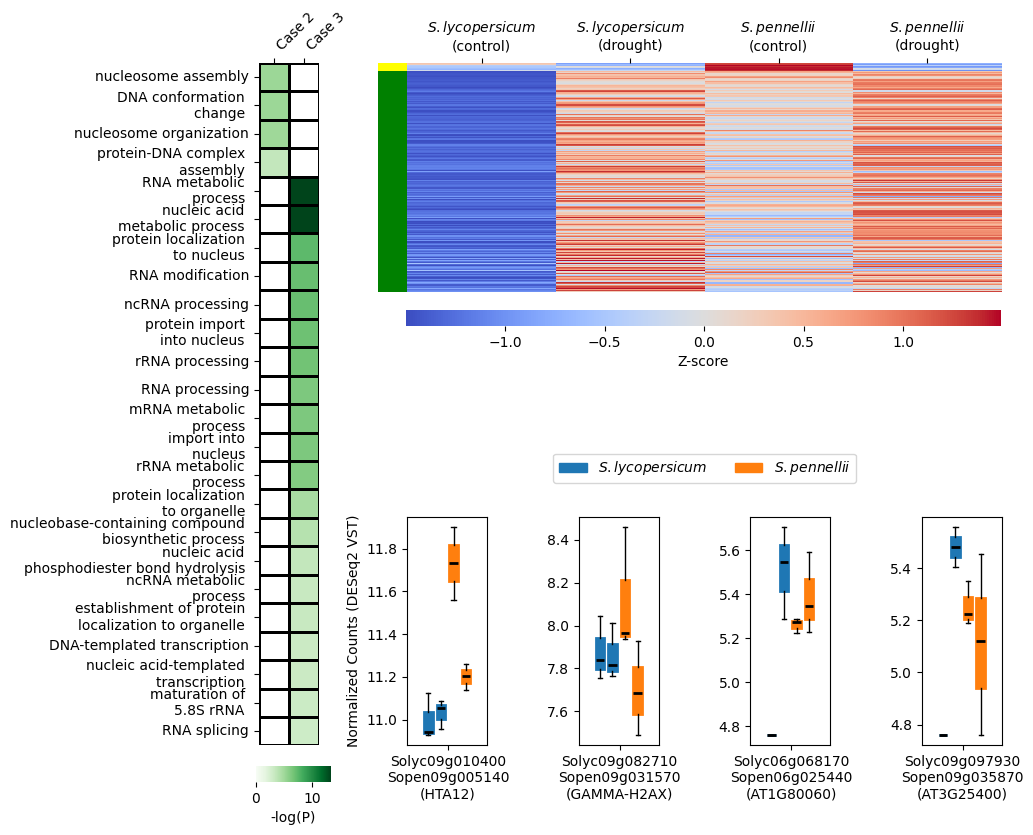

In [107]:
#def format_axes(fig):
#    for i, ax in enumerate(fig.axes):
#        ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
#        ax.tick_params(labelbottom=False, labelleft=False)

fig = plt.figure(layout="constrained", figsize=(10,8))

gs = GridSpec(5, 10, figure=fig, hspace=0.1, wspace=0.2)

ax0 = fig.add_subplot(gs[0:, 0:2])

cbar_ax0 = fig.add_axes([0.25, 0.03, 0.075, 0.02])
sns.heatmap(df2, cmap="Greens", ax=ax0, linecolor="k", linewidth=.8, cbar_ax=cbar_ax0, cbar_kws = {"label":"-log(P)", 'orientation':'horizontal'},annot_kws={"size": 6}, vmin=0)
ax0.set_ylabel('') 
ax0.set_xticklabels(["Case 2","Case 3"], rotation = 45, ha = "left")
ax0.tick_params(left=True, bottom=False, top=True, labeltop=True, labelbottom=False)

ax1 = fig.add_subplot(gs[0:2, 2:])

cbar_ax1 = fig.add_axes([0.4, 0.6, 0.595, 0.02])
sns.heatmap(zscore_df.drop(['Group'], axis=1), ax=ax1, cmap="coolwarm",cbar_ax=cbar_ax1,cbar_kws={'label': 'Z-score','orientation':'horizontal'},yticklabels=False)
lut = {'Stress-ready (case 2)': 'yellow', 'Stress-ready (case 3)': 'green'}
row_colors = zscore_df['Group'].map(lut)
for i, color in enumerate(row_colors):
    ax1.add_patch(plt.Rectangle(xy=(-0.05, i), width=0.05, height=1, color=color, lw=0,
                               transform=ax1.get_yaxis_transform(), clip_on=False))

ax1.tick_params(left=False, bottom=False, top=True, labeltop=True,labelbottom=False)
#ax1.set_yticklabels([])
ax1.set_xticklabels(["$\it{S. lycopersicum}$\n(control)","$\it{S. lycopersicum}$\n(drought)","$\it{S. pennellii}$\n(control)","$\it{S.pennellii}$\n(drought)"], rotation = 0, ha = "center")


ax2 = fig.add_subplot(gs[3:, 2:4])

#ax2.plot(0,0)

#Solyc09g010400	Sopen09g005140	ortholog_12597	-0.54605410571863
sly_control1 = [10.9276342869734,11.1241428328347,10.9441763589824]
sly_drought1 = [11.052952349541, 11.0856132881269, 10.9548193609718]
spe_control1 = [11.5598508155185,11.9013459194217,11.7334814702834]
spe_drought1 = [11.2600589779376,11.2045187155258,11.1401478565566]

ax2.boxplot(sly_control1,positions= [0], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(sly_drought1,positions = [0.3], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_control1,positions = [0.6], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange", "facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_drought1,positions = [0.9], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.set_xticks([0.47],["Solyc09g010400\nSopen09g005140\n(HTA12)"])
ax2.set_ylabel("Normalized Counts (DESeq2 VST)")		


#Solyc09g082710	Sopen09g031570	ortholog_9872	-0.53714497213417
ax3= fig.add_subplot(gs[3:,4:6])
#ax3.plot(0,0)

sly_control2 = [8.04480773409128,7.84030991952215,7.75499859150296]
sly_drought2 = [7.7636254060006, 8.0113538392524, 7.81525514150947]
spe_control2 = [7.96576363267084,8.45984605614018,7.9347549404084]
spe_drought2 = [7.92636118836058,7.687025101228, 7.48849941701766]

ax3.boxplot(sly_control2,positions= [0.0], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax3.boxplot(sly_drought2,positions = [0.3], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax3.boxplot(spe_control2,positions = [0.6], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax3.boxplot(spe_drought2,positions = [0.9], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax3.set_xticks([0.47],["Solyc09g082710\nSopen09g031570\n(GAMMA-H2AX)"])

###blue_patch = mpatches.Patch(color='tab:blue', label='$\it{S. lycopersicum}$')
###ax3.legend(handles=[blue_patch],bbox_to_anchor=(0.5, -0.01))

##Solyc06g068170	Sopen06g025440	ortholog_13336	5.27650708330517
ax4 = fig.add_subplot(gs[3:, 6:8])

sly_control3 = [4.75979081854539,4.75979081854539,4.75979081854539]
sly_drought3 = [5.28518040594981,5.70520603543415,5.54443806808631]
spe_control3 = [5.27314162178969,5.28595880823219,5.22197052659145]
spe_drought3 = [5.59200689153499,5.22658762807643,5.34755934673171]

ax4.boxplot(sly_control3,positions= [0], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax4.boxplot(sly_drought3,positions = [0.3], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax4.boxplot(spe_control3,positions = [0.6], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax4.boxplot(spe_drought3,positions = [0.9], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax4.set_xticks([0.47],["Solyc06g068170\nSopen06g025440\n(AT1G80060)"])

#Solyc09g097930	Sopen09g035870	ortholog_13242	5.10540002548879
ax5 = fig.add_subplot(gs[3:, 8:])
sly_control4 = [4.75979081854539, 4.75979081854539, 4.75979081854539]
sly_drought4 = [5.55661214868588, 5.47981780004976, 5.40303671390057]
spe_control4 = [5.35153268174187, 5.19019230875079, 5.22197052659145]
spe_drought4 = [5.11866349705162, 4.75979081854539, 5.45336911161532]

ax5.boxplot(sly_control4,positions= [0], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax5.boxplot(sly_drought4,positions = [.3], widths=0.2, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax5.boxplot(spe_control4,positions = [.6], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax5.boxplot(spe_drought4,positions = [.9], widths=0.2, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax5.set_xticks([0.47],["Solyc09g097930\nSopen09g035870\n(AT3G25400)"])


#########3 ax6
ax6 = fig.add_subplot(gs[2,2:])
blue_patch = mpatches.Patch(color='tab:blue', label='$\it{S. lycopersicum}$')
orange_patch = mpatches.Patch(color='tab:orange', label='$\it{S. pennellii}$')
ax6.axis('off')
ax6.legend(handles=[blue_patch,orange_patch], loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=2)

plt.show()
##ax2.set_ylabel("Normalized Counts")

Text(0, 0.5, 'Normalized Counts (DESeq2 VST)')

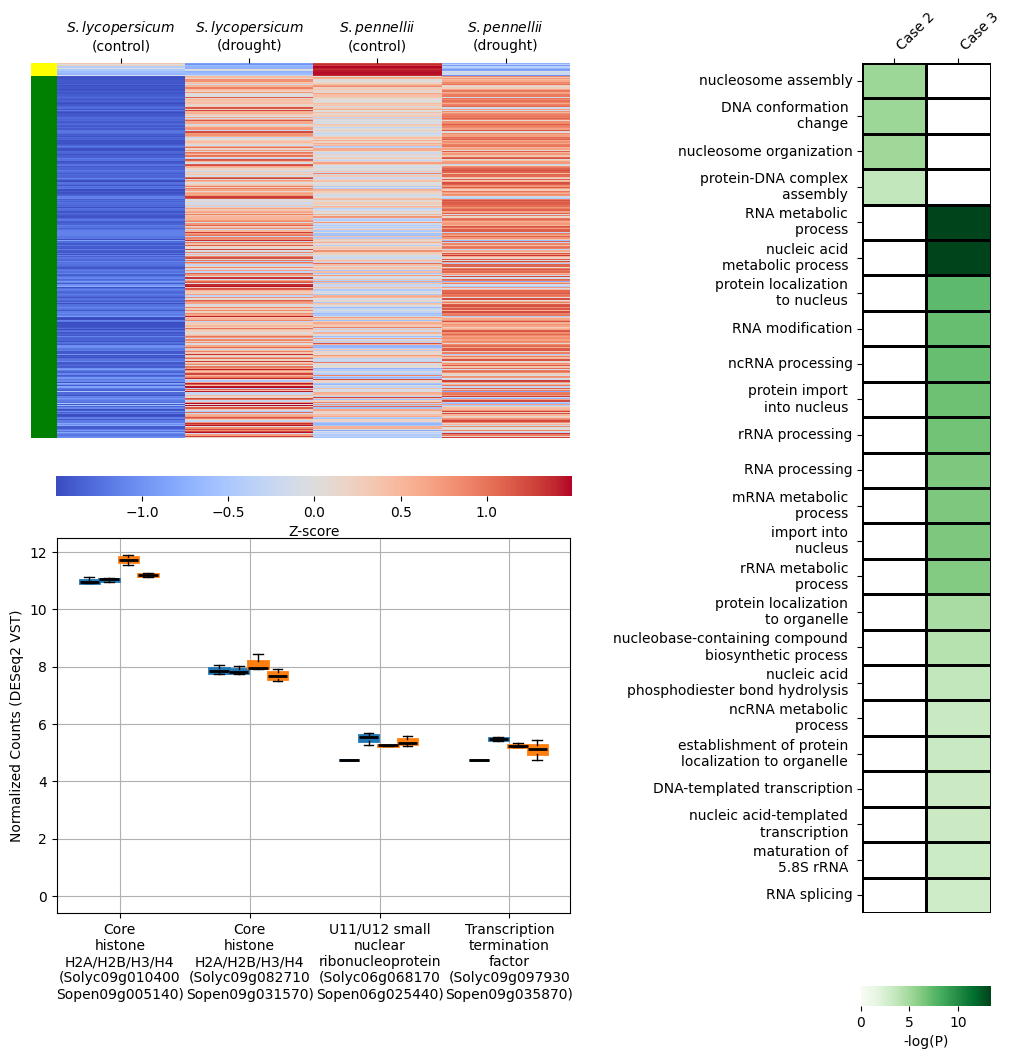

In [27]:
fig = plt.figure(layout="constrained", figsize=(10,10))

gs = GridSpec(2, 5, figure=fig, hspace=0.1, wspace=0.2)

ax0 = fig.add_subplot(gs[:, 4])

cbar_ax0 = fig.add_axes([0.855, 0, 0.130, 0.02])
sns.heatmap(df2, cmap="Greens", ax=ax0, linecolor="k", linewidth=.8, cbar_ax=cbar_ax0, cbar_kws = {"label":"-log(P)", 'orientation':'horizontal'},annot_kws={"size": 6}, vmin=0)
ax0.set_ylabel('') 
ax0.set_xticklabels(["Case 2","Case 3"], rotation = 45, ha = "left")
ax0.tick_params(left=True, bottom=False, top=True, labeltop=True, labelbottom=False)

ax1 = fig.add_subplot(gs[0, 0:4])

cbar_ax1 = fig.add_axes([0.05, 0.51, 0.5158, 0.02])
sns.heatmap(zscore_df.drop(['Group'], axis=1), ax=ax1, cmap="coolwarm",cbar_ax=cbar_ax1,cbar_kws={'label': 'Z-score','orientation':'horizontal'},yticklabels=False)
lut = {'Stress-ready (case 2)': 'yellow', 'Stress-ready (case 3)': 'green'}
row_colors = zscore_df['Group'].map(lut)
for i, color in enumerate(row_colors):
    ax1.add_patch(plt.Rectangle(xy=(-0.05, i), width=0.05, height=1, color=color, lw=0,
                               transform=ax1.get_yaxis_transform(), clip_on=False))

ax1.tick_params(left=False, bottom=False, top=True, labeltop=True,labelbottom=False)
#ax1.set_yticklabels([])
ax1.set_xticklabels(["$\it{S. lycopersicum}$\n(control)","$\it{S. lycopersicum}$\n(drought)","$\it{S. pennellii}$\n(control)","$\it{S.pennellii}$\n(drought)"], rotation = 0, ha = "center")


ax2 = fig.add_subplot(gs[1, 0:4])

ax2.plot(0,0)

#Solyc09g010400	Sopen09g005140	ortholog_12597	-0.54605410571863
sly_control1 = [10.9276342869734,11.1241428328347,10.9441763589824]
sly_drought1 = [11.052952349541, 11.0856132881269, 10.9548193609718]
spe_control1 = [11.5598508155185,11.9013459194217,11.7334814702834]
spe_drought1 = [11.2600589779376,11.2045187155258,11.1401478565566]

ax2.boxplot(sly_control1,positions= [0], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(sly_drought1,positions = [0.3], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_control1,positions = [0.6], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange", "facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_drought1,positions = [0.9], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)

			
#Solyc09g082710	Sopen09g031570	ortholog_9872	-0.53714497213417
sly_control2 = [8.04480773409128,7.84030991952215,7.75499859150296]
sly_drought2 = [7.7636254060006, 8.0113538392524, 7.81525514150947]
spe_control2 = [7.96576363267084,8.45984605614018,7.9347549404084]
spe_drought2 = [7.92636118836058,7.687025101228, 7.48849941701766]

ax2.boxplot(sly_control2,positions= [2], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(sly_drought2,positions = [2.3], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_control2,positions = [2.6], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_drought2,positions = [2.9], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)

#Solyc06g068170	Sopen06g025440	ortholog_13336	5.27650708330517
sly_control3 = [4.75979081854539,4.75979081854539,4.75979081854539]
sly_drought3 = [5.28518040594981,5.70520603543415,5.54443806808631]
spe_control3 = [5.27314162178969,5.28595880823219,5.22197052659145]
spe_drought3 = [5.59200689153499,5.22658762807643,5.34755934673171]

ax2.boxplot(sly_control3,positions= [4], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(sly_drought3,positions = [4.3], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_control3,positions = [4.6], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_drought3,positions = [4.9], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)

#Solyc09g097930	Sopen09g035870	ortholog_13242	5.10540002548879
sly_control4 = [4.75979081854539, 4.75979081854539, 4.75979081854539]
sly_drought4 = [5.55661214868588, 5.47981780004976, 5.40303671390057]
spe_control4 = [5.35153268174187, 5.19019230875079, 5.22197052659145]
spe_drought4 = [5.11866349705162, 4.75979081854539, 5.45336911161532]

ax2.boxplot(sly_control4,positions= [6], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(sly_drought4,positions = [6.3], widths=0.3, boxprops= {"linewidth":2,"color":"tab:blue"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_control4,positions = [6.6], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)
ax2.boxplot(spe_drought4,positions = [6.9], widths=0.3, boxprops= {"linewidth":2,"color":"tab:orange","facecolor": "tab:orange"}, medianprops = {"linewidth":2,"color":"black"},patch_artist=True)

ax2.grid()

ax2.set_xticks([0.47, 2.47, 4.47, 6.47],["Core\nhistone\nH2A/H2B/H3/H4\n(Solyc09g010400\nSopen09g005140)", "Core\nhistone\nH2A/H2B/H3/H4\n(Solyc09g082710\nSopen09g031570)", "U11/U12 small\nnuclear\nribonucleoprotein\n(Solyc06g068170\nSopen06g025440)", "Transcription\ntermination\nfactor\n(Solyc09g097930\nSopen09g035870)"])
ax2.set_ylabel("Normalized Counts (DESeq2 VST)")
